# Definindo o melhor valor para K para SelectKBest

- Começando com o dataset load_wine do scikit-learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import pandas as pd
base = pd.read_csv("cartaocredito.csv")
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Separando as variaveis

In [2]:
X = base.drop("Class", axis = 1)
y = base.Class

### Treino e teste

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

### Importando as funções

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Criando as funções para SelectKBest e DecisionTreeClassifier

In [7]:
def selecionarColunas(i):
    seletor = SelectKBest(k=i)
    seletor.fit(X_train,y_train)
    return seletor.get_feature_names_out()

In [8]:
def arvoreDecisao():
    clf = DecisionTreeClassifier(random_state=0)
    X_train_best = X_train.loc[:,colunas]
    X_test_best = X_test.loc[:,colunas]
    clf = clf.fit(X_train_best, y_train)
    return clf.predict(X_test_best)

## Testando diferentes valores para K

In [9]:
k = []
f1 = []

for i in range(1,len(X_train.columns)):
    
    # Selecionando as colunas
    colunas = selecionarColunas(i)
    
    # Realizando previsão 
    y_predict = arvoreDecisao()
     
    # Avaliando o modelo
    f1_k = f1_score(y_test, y_predict)
    
    
    # Salvando as informações
    k.append(i)
    f1.append(f1_k)

## Visualizando o desempenho de cada K com o f1_score

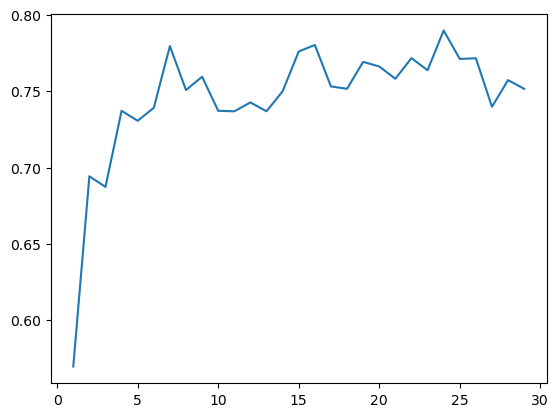

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(k, f1)

plt.show()

### Assim podemos ver o desempenho com cada numero de k e escolher o que nos atende melhor

# Definindo o melhor valor de K para o Knn

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

### Utilizando o iris como dataFrame

In [2]:
df = load_iris(as_frame = True)['data']
df['type'] = load_iris(as_frame = True)['target']

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Separando X e Y

In [3]:
X = load_iris(as_frame = True)['data']
y = load_iris(as_frame = True)['target']

### Treino e teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

## Definindo a função de classificação knn

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
def knn(i):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Testando diferentes valores para o K

In [8]:
from sklearn.metrics import precision_score

In [9]:
percentual_acerto = []
k =[]

for i in range(1, 15):
   
    y_pred = knn(i)
    precisao = precision_score(y_test, y_pred, average='micro')
    
    percentual_acerto.append(precisao)
    k.append(i)

## Visualizando o desempenho da função com cada K

In [10]:
import matplotlib.pyplot as plt

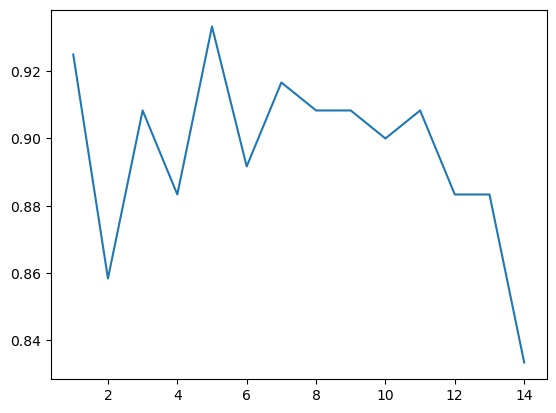

In [11]:
fig, ax = plt.subplots()

ax.plot(k, percentual_acerto)

plt.show()